<a href="https://colab.research.google.com/github/SamigullinRT/MUSORKA/blob/main/6133_SamigullinRT_lab_2__Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Лабораторная работа №2: Визуализация данных
# Самигуллин Равиль гр 6133


Датасет для первой лабы был не очень он состоял лишь из str значений, так что лучше было взять другой датасет для построения графиков. Взял Data Visualization with Titanic, этот датасет состоит преимущественно из числовых значений. В таблице вписал вторым, прошу прощения, что не смог сразу выбрать датасет который бы подходил сразу для двух лр.

# Описание датасета

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

https://www.kaggle.com/c/titanic/data?select=test.csv

1. **Survived**: выжил ли пассажир (1 - да, 0 - нет)
2. **Pclass**: класс билета пассажира (1, 2 или 3)
3. **Name**: имя пассажира
4. **Sex**: пол пассажира
5. **Age**: возраст пассажира
6. **SibSp**: количество братьев, сестер, супругов на борту
7. **Parch**: количество детей или родителей на борту
8. **Ticket**: номер билета
9. **Fare**: стоимость билета
10. **Cabin**: номер каюты
11. **Embarked**: порт посадки (C - Шербур, Q - Квинстаун, S - Саутгемптон)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import plotly
from matplotlib.widgets import Slider, Button
import seaborn as sns
import scipy.stats as stats

In [6]:
file_path = "/content/drive/MyDrive/datasets/titanik/train.csv"
# Загрузка данных CSV
df = pd.read_csv(file_path)
#df = df.dropna()
# Просмотр первых нескольких строк DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Удалим столбец 'cabin' из датасета там один nan.
df = df.drop("Cabin", axis=1)
df = df.drop("PassengerId", axis=1)
df['id'] = range(1, len(df) + 1)
df_new_index = df.set_index('id')
print(df.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  id  
0    male  22.0      1      0         A/5 21171   7.2500        S   1  
1  female  38.0      1      0          PC 17599  71.2833        C   2  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S   3  
3  female  35.0      1      0            113803  53.1000        S   4  
4    male  35.0      0      0            373450   8.0500        S   5  


In [9]:
# Найдем все None значений во всем датасете
none_values = df[df.isnull().any(axis=1)]

# строки с None значениями
print(none_values)

     Survived  Pclass                                      Name     Sex  Age  \
5           0       3                          Moran, Mr. James    male  NaN   
17          1       2              Williams, Mr. Charles Eugene    male  NaN   
19          1       3                   Masselmani, Mrs. Fatima  female  NaN   
26          0       3                   Emir, Mr. Farred Chehab    male  NaN   
28          1       3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN   
..        ...     ...                                       ...     ...  ...   
859         0       3                          Razi, Mr. Raihed    male  NaN   
863         0       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN   
868         0       3               van Melkebeke, Mr. Philemon    male  NaN   
878         0       3                        Laleff, Mr. Kristo    male  NaN   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN   

     SibSp  Parch      Ticket     Fare 

179 значений, теперь избавимся от них

In [10]:
df = df.dropna()

### Задание 1.matplotlib:

Построить несколько графиков разного вида с использованием matplotlib.

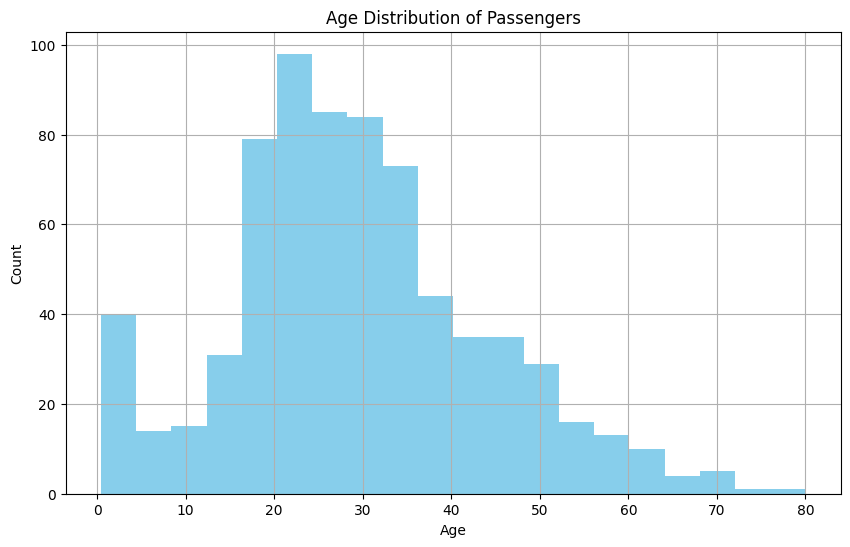

In [11]:
# Создаем гистограмму возраста пассажиров
plt.figure(figsize=(10,6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.grid(True)
plt.show()

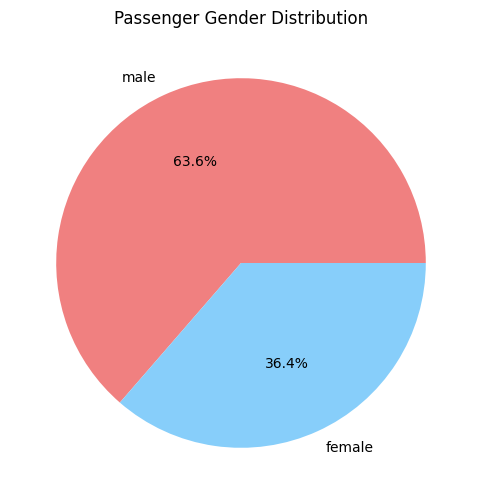

In [12]:
# Создаем круговую диаграмму для сравнения количества мужчин и женщин
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Passenger Gender Distribution')
plt.show()

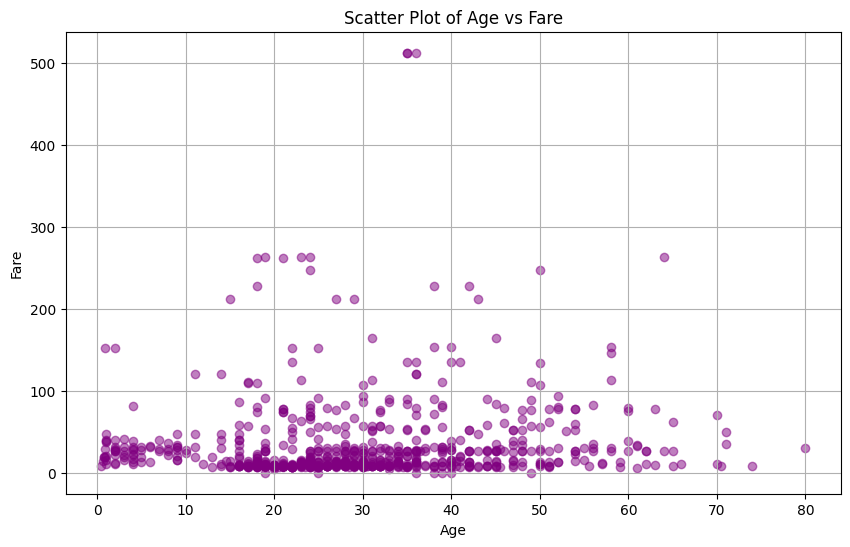

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Fare'], color='purple', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.grid(True)
plt.show()

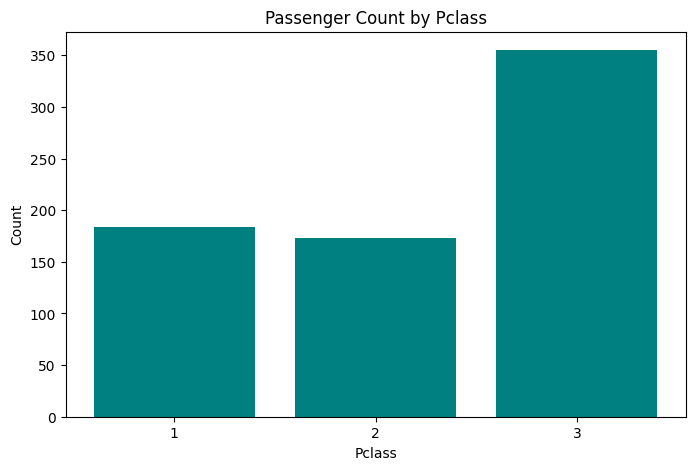

In [14]:
class_counts = df['Pclass'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(class_counts.index, class_counts.values, color='teal')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Count by Pclass')
plt.xticks(class_counts.index)
plt.show()

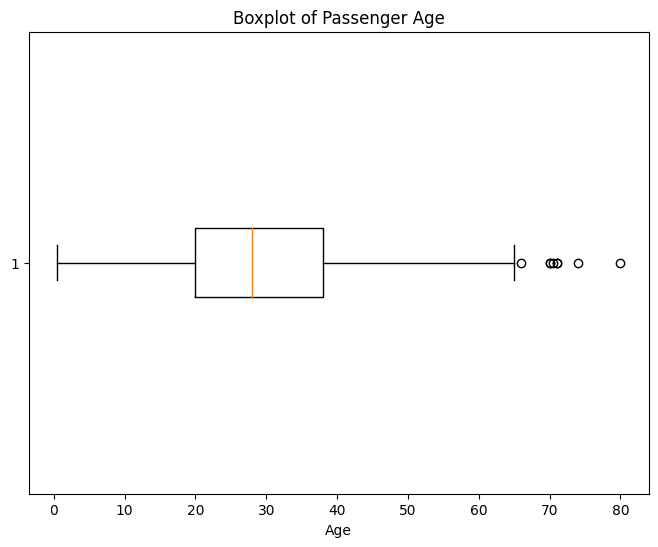

In [15]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.xlabel('Age')
plt.title('Boxplot of Passenger Age')
plt.show()

Построить несколько суб-графиков на одном графике используя .subplot.

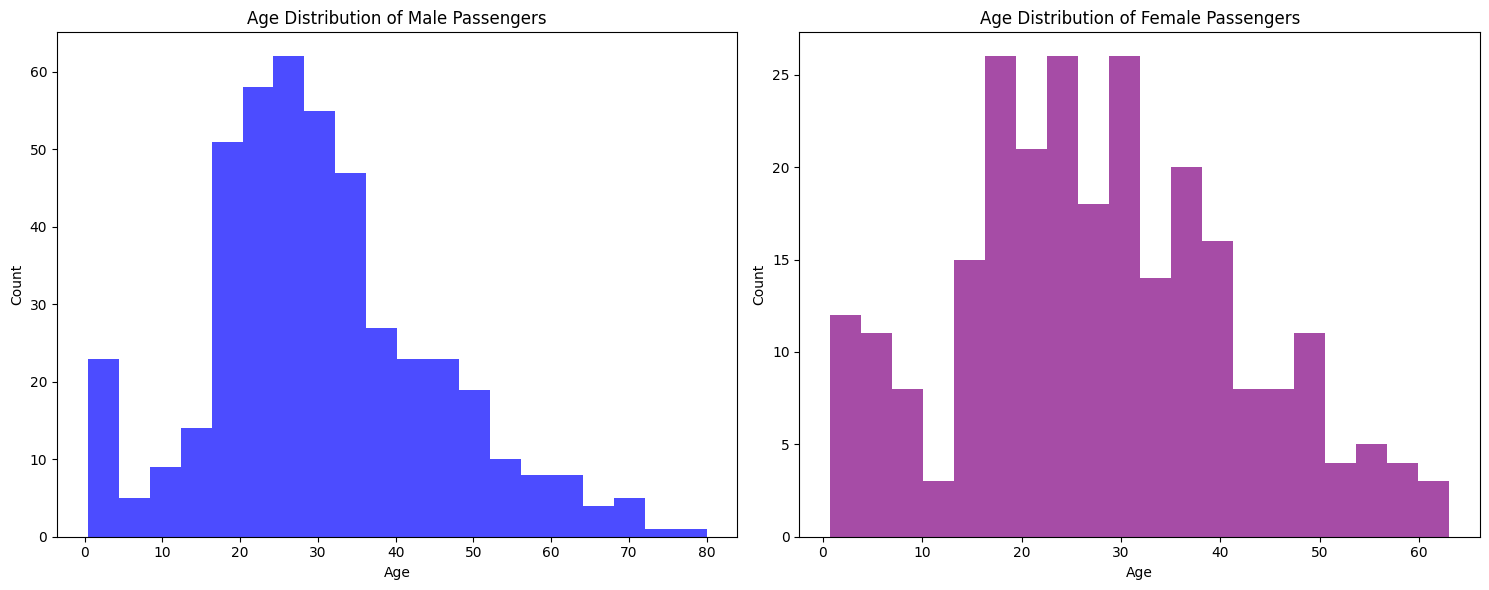

In [16]:
# Создаем два подграфика (1 ряд, 2 столбца)
plt.figure(figsize=(15, 6))

# Суб-график для мужчин
plt.subplot(1, 2, 1)
plt.hist(df[df['Sex'] == 'male']['Age'].dropna(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Male Passengers')

# Суб-график для женщин
plt.subplot(1, 2, 2)
plt.hist(df[df['Sex'] == 'female']['Age'].dropna(), bins=20, color='purple', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Female Passengers')

plt.tight_layout()
plt.show()

Построить интерактивный график со слайдером.

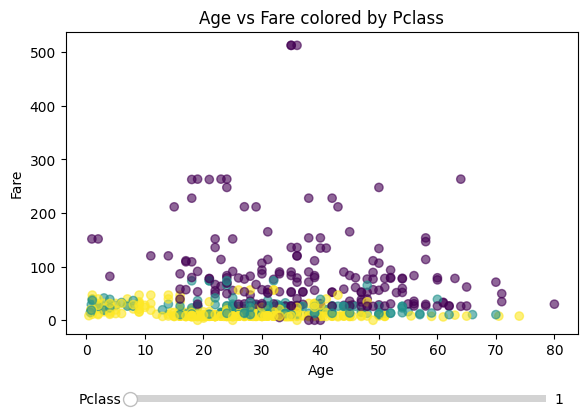

In [17]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)  # Настройка положения графика

scatter = ax.scatter(df['Age'], df['Fare'], c=df['Pclass'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('Age vs Fare colored by Pclass')

plt.ion()  # Включаем интерактивный режим

# Создание слайдера
slider_ax = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Pclass', 1, 3, valinit=1, valstep=1)

def update(val):
    pclass = int(slider.val)
    color = df['Pclass'] == pclass

    scatter.set_offsets(df[['Age', 'Fare']][color])
    scatter.set_array(df['Pclass'][color])

    plt.draw()

slider.on_changed(update)

def onpick(event):
    if isinstance(event.artist, plt.collections.PathCollection):
        ind = event.ind[0]
        print(f'PassengerId: {df.iloc[ind]["PassengerId"]}, Pclass: {df.iloc[ind]["Pclass"]}, Age: {df.iloc[ind]["Age"]}, Fare: {df.iloc[ind]["Fare"]}')

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

Слайдер был не интерактивным. Построил на ipywidgets

In [18]:
from ipywidgets import interactive

# Генерируем случайные данные для примера
def update_plot(Pclass=1):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[df['Pclass'] == Pclass]['Age'], df[df['Pclass'] == Pclass]['Fare'], c='b', alpha=0.6)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title(f'Age vs Fare for Pclass {Pclass}')
    plt.grid(True)
    plt.show()

interactive_plot = interactive(update_plot, Pclass=(1, 3, 1))
interactive_plot

interactive(children=(IntSlider(value=1, description='Pclass', max=3, min=1), Output()), _dom_classes=('widget…

### Задание 2.pandas:

Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot.
Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

Метод DataFrame:

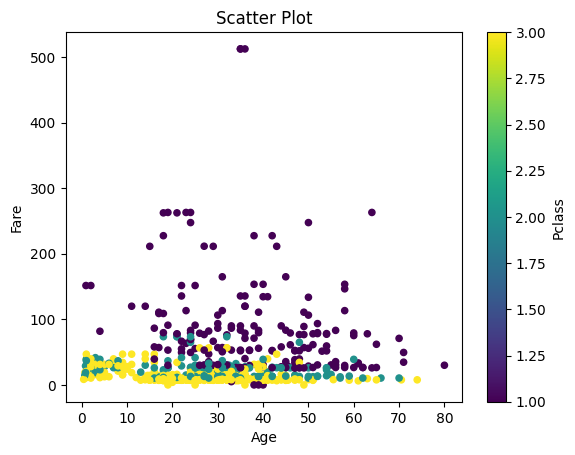

In [19]:
df.plot.scatter(x='Age', y='Fare', title='Scatter Plot', c='Pclass', colormap='viridis')
plt.show()

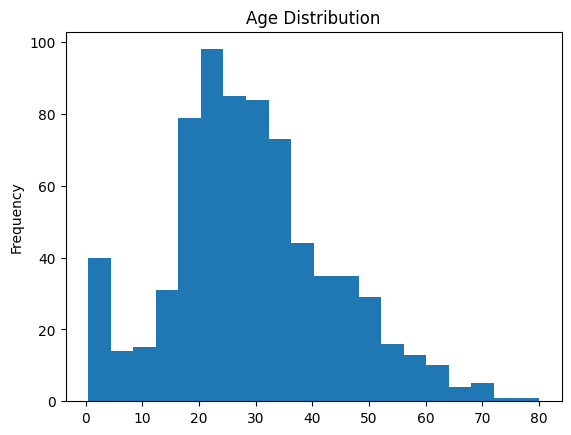

In [20]:
df['Age'].plot.hist(title='Age Distribution', bins=20)
plt.show()

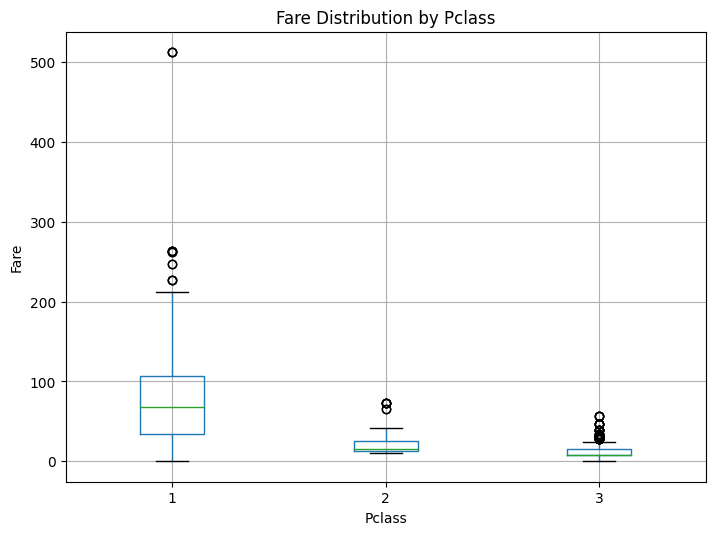

In [21]:
df.boxplot(column='Fare', by='Pclass', figsize=(8, 6))
plt.title('Fare Distribution by Pclass')
plt.ylabel('Fare')
plt.xlabel('Pclass')
plt.suptitle('')
plt.show()

Метод Series

In [22]:
# Создаем Series на основе столбцов 'Age', 'Fare' и 'Pclass'
age_series = df['Age']
fare_series = df['Fare']
pclass_series = df['Pclass']

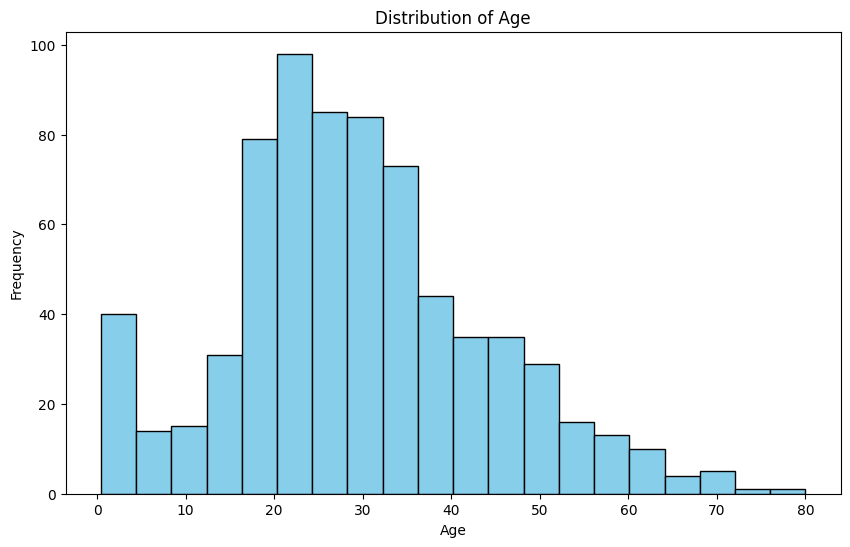

In [23]:
# Строим гистограмму для столбца 'Age'
plt.figure(figsize=(10, 6))
age_series.plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

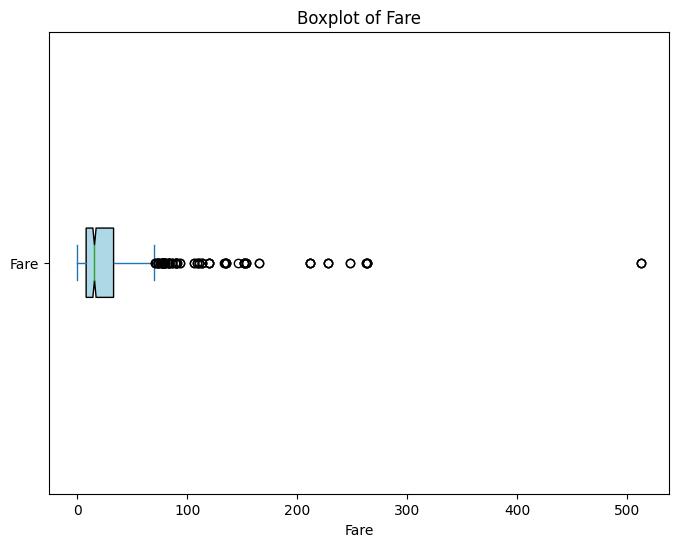

In [24]:
# Строим ящик с усами для столбца 'Fare'
plt.figure(figsize=(8, 6))
fare_series.plot(kind='box', vert=False, patch_artist=True, notch=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

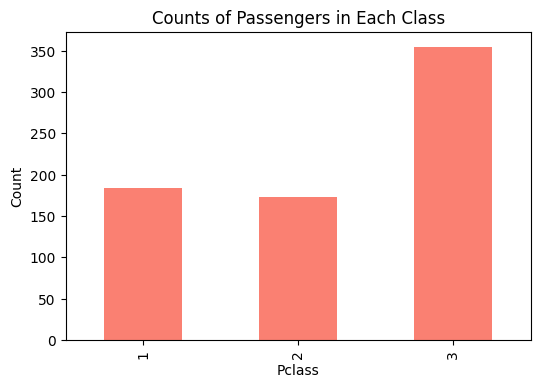

In [25]:
# Строим счетный график для столбца 'Pclass'
plt.figure(figsize=(6, 4))
pclass_counts = pclass_series.value_counts().sort_index()
pclass_counts.plot(kind='bar', color='salmon')
plt.title('Counts of Passengers in Each Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

### Задание 3.seaborn:

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

Построить график .heatmap попарной корреляции всех числовых признаков.

Категориальные признаки необходимо убрать из датафрейма перед построением.

In [26]:
df = pd.read_csv(file_path)
# Удалить столбец 'cabin' из датасета
df = df.drop("Cabin", axis=1)
df = df.drop("PassengerId", axis=1)
df['id'] = range(1, len(df) + 1)
df_new_index = df.set_index('id')
df.dropna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,id
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,886
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,887
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,888
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,890


In [27]:
# Убрать категориальные признаки
numerical_data = df.select_dtypes(include=['float64', 'int64'])

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.


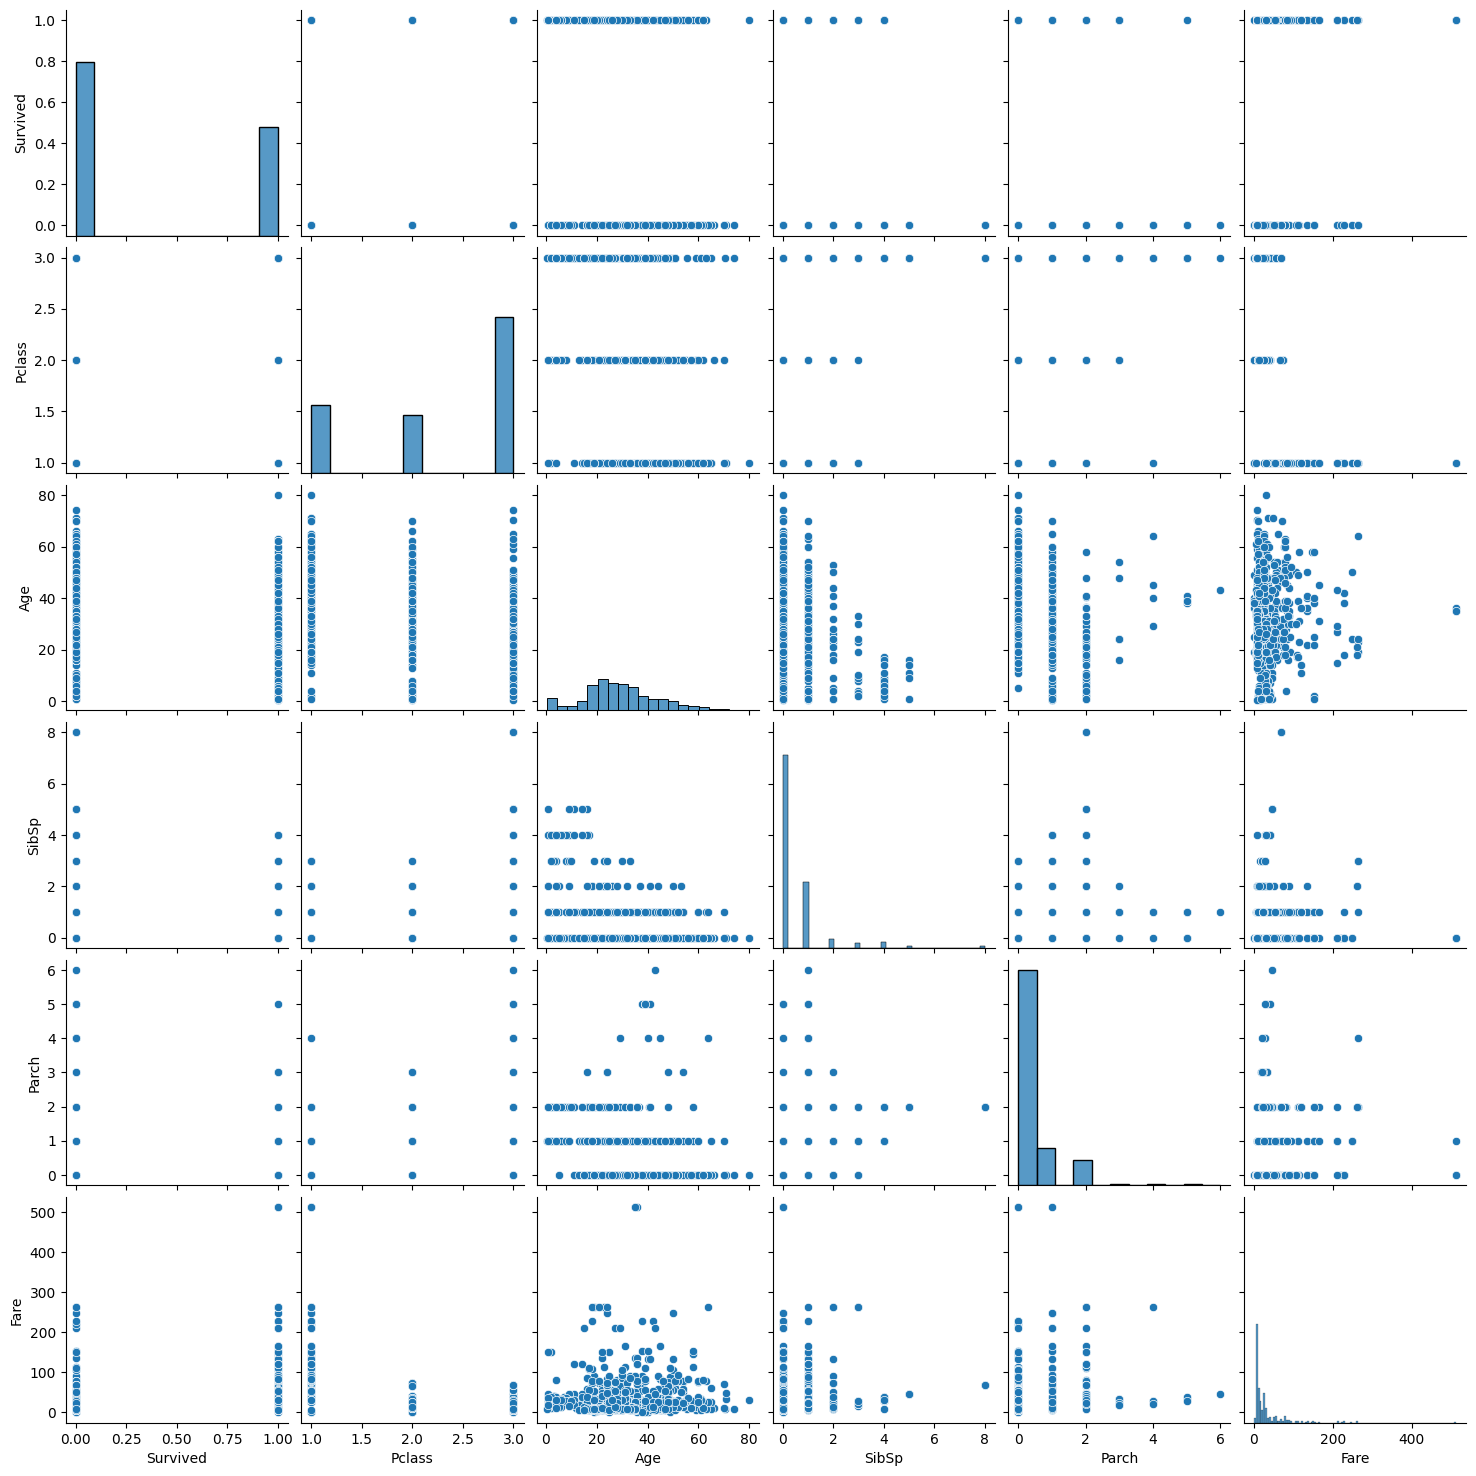

In [28]:
# Построение pairplot
sns.pairplot(numerical_data.drop(columns=['id']))

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

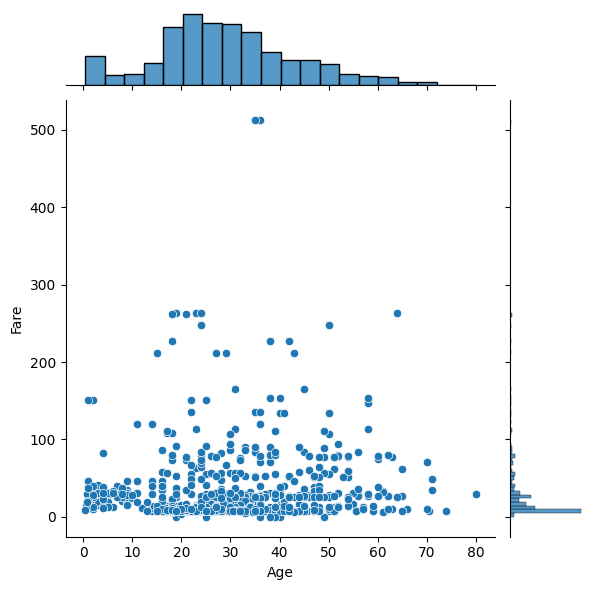

In [29]:
# Построение jointplot для двух числовых признаков 'feature1' и 'feature2'
sns.jointplot(x='Age', y='Fare', data=numerical_data)


Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

<Axes: xlabel='Pclass', ylabel='Fare'>

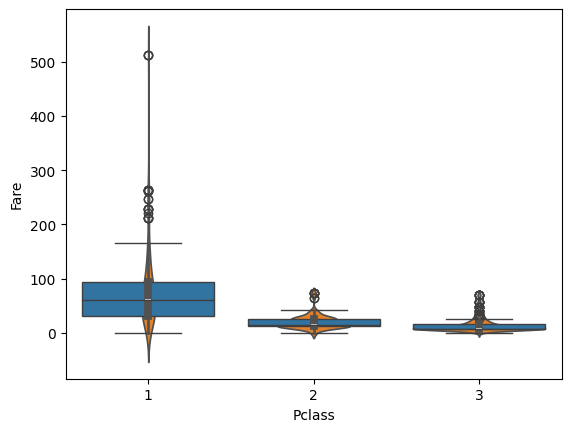

In [30]:
# Построение boxplot
sns.boxplot(x='Pclass', y='Fare', data=numerical_data)
# Или построение violinplot
sns.violinplot(x='Pclass', y='Fare', data=numerical_data)

Построить график .heatmap попарной корреляции всех числовых признаков.

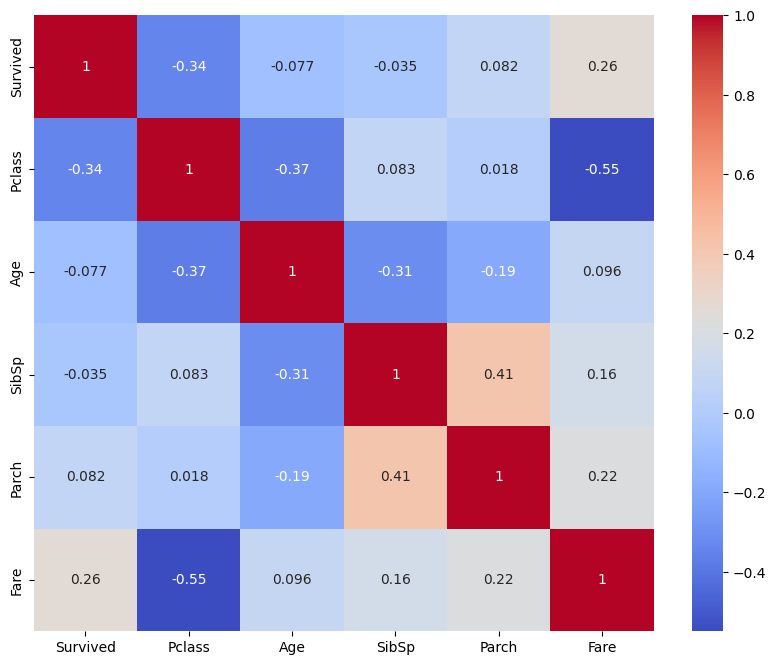

In [31]:
# Вычисление корреляции числовых признаков

correlation_matrix = numerical_data.drop(columns=['id']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Задание 4. scipy.stats:

Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

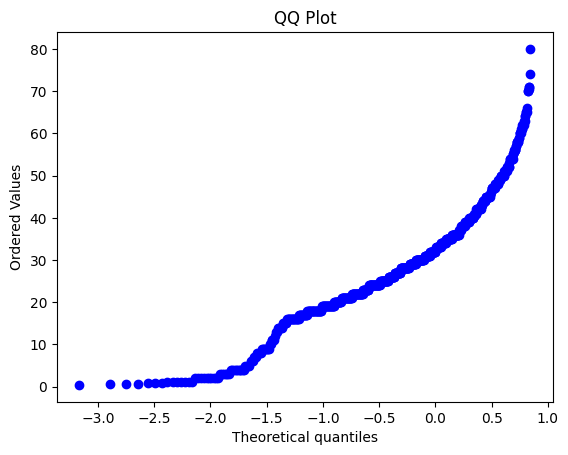

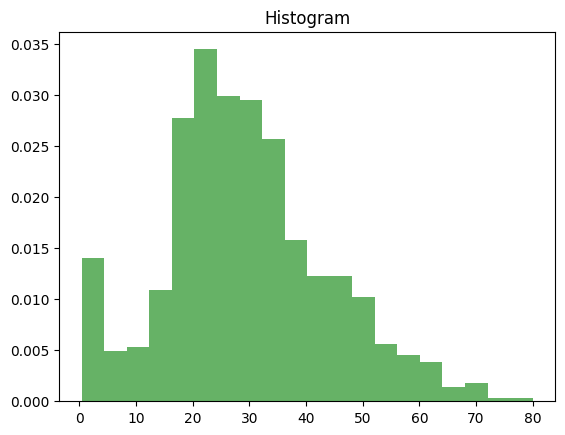

In [32]:
# QQ-график
stats.probplot(df["Age"], dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

# Гистограмма
plt.hist(df["Age"], bins=20, density=True, alpha=0.6, color='g')
plt.title("Histogram")
plt.show()

### Задание 5. plotly:

Построить несколько графиков разного вида.

Построить несколько суб-графиков на одном графике.

Построить интерактивный график.

Использование Dash опционально.

In [33]:
import plotly.express as px

fig = px.histogram(df, x="Age", title="Распределение возраста пассажиров")
fig.show()

In [34]:
# Переименуем столбцы для ясности
gender_count = df['Sex'].value_counts().reset_index()
gender_count.columns = ['Sex', 'Count']
fig = px.pie(gender_count, values='Count', names='Sex', title='Соотношение мужчин и женщин на борту')
fig.show()

In [35]:
fig = px.box(df, x='Pclass', y='Fare', title='Тарифы в разных классах')
fig.show()

Два суб-графика на одной графике.

In [36]:
import plotly.graph_objects as go

fig = go.Figure()

# Гистограмма возраста для мужчин
fig.add_trace(go.Histogram(x=df[df['Sex'] == 'male']['Age'], name='Мужчины', marker_color='blue'))

# Гистограмма возраста для женщин
fig.add_trace(go.Histogram(x=df[df['Sex'] == 'female']['Age'], name='Женщины', marker_color='pink'))

fig.update_layout(barmode='overlay', title='Распределение возраста по полу')
fig.show()

Интерактивный график без Dash.

In [37]:
# Определите порядок категорий для параметра animation_frame
category_orders = {'Pclass': [3, 2, 1]}

# Теперь строим интерактивный график с использованием Plotly с добавлением слайдера для Pclass
fig = px.scatter(df, x='Age', y='Fare', color='Survived', hover_data=['Name'],
                 title="Passenger Age vs Fare by Pclass",
                 animation_frame='Pclass',
                 category_orders=category_orders)

# Настройка осей и подписей
fig.update_layout(xaxis_title="Age",
                  yaxis_title="Fare",
                  title="Passenger Age vs Fare by Pclass",
                  hoverlabel=dict(bgcolor="white", font_size=16))

# Автоматическое масштабирование осей X и Y
fig.update_xaxes(range=[df['Age'].min(), df['Age'].max()])  # автоскалирование по оси X
fig.update_yaxes(range=[df['Fare'].min(), df['Fare'].max()])  # автоскалирование по оси Y

fig.show()

Использовал Dash и построил интерактивный график

In [39]:
!pip install dash plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.9 MB/s eta 0:00:00


In [40]:
import dash
from dash import html, dcc, Input, Output
import pandas as pd
import plotly.express as px


fig = px.scatter(df, x='id', y='Age', color='Sex', hover_data=['Name'], title='Passengers',
                 symbol='Survived', symbol_sequence=['circle', 'x'])
fig.update_traces(marker_size=10, marker_line_width=2)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph', figure=fig),
    html.Label('Select Pclass:'),
    dcc.Dropdown(
        id='pclass-dropdown',
        options=[{'label': str(cls), 'value': cls} for cls in df['Pclass'].unique()],
        value=df['Pclass'].unique(),
        multi=True
    )
])

@app.callback(
    Output('graph', 'figure'),
    Input('pclass-dropdown', 'value')
)
def update_figure(selected_classes):
    filtered_df = df[df['Pclass'].isin(selected_classes)]
    fig = px.scatter(filtered_df, x='id', y='Age', color='Sex', hover_data=['Name'], title='Passengers',
                     symbol='Survived', symbol_sequence=['circle', 'x'])
    fig.update_traces(marker_size=10, marker_line_width=2)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>